# Introduction to Time Series Forecasting

Time series forecasting is the process of predicting future values based on previously observed values in a time series. Time series data is a sequence of data points collected over time, such as stock prices, weather measurements, or sales data.

In this notebook, we will explore:
- Key concepts of time series analysis, such as stationarity and autocorrelation.
- The differences between forecasting and prediction.
- The theoretical foundation of the **Durbin-Levinson Algorithm** and the **Innovations Algorithm**.
- Practical implementations using Python to understand the `forecast`, `get_forecast`, `prediction`, and `get_prediction` functions.

### Key Concepts of Time Series Analysis

1. **Stationarity**:
   A time series is considered stationary if its properties, such as the mean and variance, are constant over time. Stationary time series are easier to model and forecast.

2. **Autocorrelation**:
   Autocorrelation is the correlation of a time series with a lagged version of itself. It helps understand the relationships between past and present values.

3. **Models**:
   - **Autoregressive (AR)** models: Predict future values based on a linear combination of past values.
   - **Moving Average (MA)** models: Use past forecast errors to predict future values.
   - **ARIMA (Autoregressive Integrated Moving Average)**: Combines AR and MA with differencing to handle non-stationary data.

### Objectives of this Notebook

By the end of this notebook, you will understand:
- The theory behind the **Durbin-Levinson** and **Innovations** algorithms.
- How to implement time series forecasting models in Python.
- The differences and use cases of the functions `forecast`, `get_forecast`, `prediction`, and `get_prediction`.





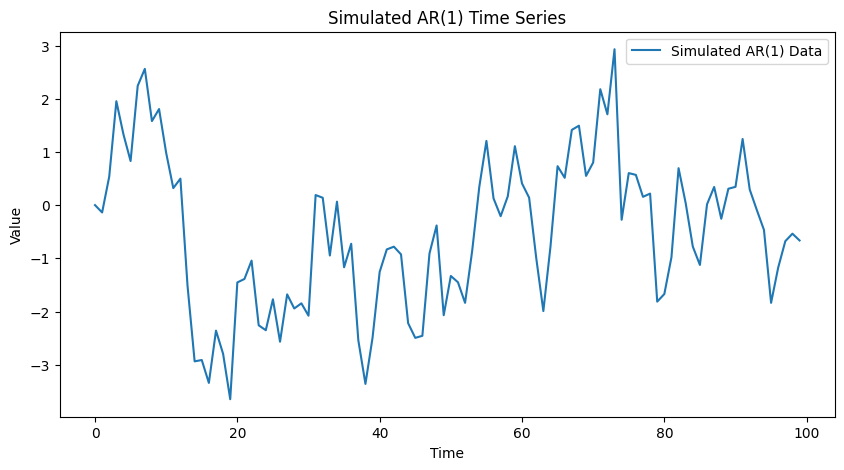

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating AR(1) time series data
np.random.seed(42)
n = 100
phi = 0.8  # AR(1) coefficient
noise = np.random.normal(size=n)
data = np.zeros(n)

for t in range(1, n):
    data[t] = phi * data[t-1] + noise[t]

# Plot the simulated data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Simulated AR(1) Data')
plt.title('Simulated AR(1) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# The Durbin-Levinson Algorithm

The **Durbin-Levinson Algorithm** is a recursive method used to estimate the coefficients of an autoregressive (AR) model and compute predictions. It is particularly useful for solving the **Yule-Walker equations**, which are used in estimating parameters for AR models.

### Theory Behind the Durbin-Levinson Algorithm
The Durbin-Levinson algorithm allows us to predict future values of a stationary time series using past values. It is based on solving the Yule-Walker equations, which relate the autocorrelation function of a stationary time series to the AR model parameters.

#### The Yule-Walker Equations:
For an AR($p$) process, the Yule-Walker equations are given as:

$$
\gamma(h) = \sum_{k=1}^{p} \phi_k \gamma(h-k) + \sigma^2 \delta_{h0}
$$

Where:
- $\gamma(h)$ is the autocovariance at lag $h$,
- $\phi_k$ are the AR coefficients,
- $\sigma^2$ is the variance of the white noise,
- $\delta_{h0}$ is the Kronecker delta function.

The Durbin-Levinson algorithm is designed to recursively calculate the AR coefficients $\phi_k$ and the one-step-ahead predictions for an AR model.

### Algorithm Outline:
1. Initialize: Start with a guess for $\phi_1$, the first autoregressive coefficient.
2. Recursion: Use the previous solution to calculate the next order of autoregressive coefficients.
3. Terminate: Continue recursion until the desired order $p$ is reached.
4. Forecast: The model can now be used to forecast future values.


## Durbin-Levinson Algorithm - Mathematical Theory

The **Durbin-Levinson Algorithm** is used to recursively estimate the coefficients of an autoregressive (AR) model and solve the **Yule-Walker equations**. It works particularly well for stationary time series data.

### Yule-Walker Equations for AR(p) Model:

For an AR(p) model, the Yule-Walker equations are:

$$
\gamma(h) = \sum_{k=1}^{p} \phi_k \gamma(h-k) + \sigma^2 \delta_{h0}
$$

Where:
- $\gamma(h)$ is the autocovariance at lag $h$,
- $\phi_k$ are the autoregressive coefficients,
- $\sigma^2$ is the variance of the white noise,
- $\delta_{h0}$ is the Kronecker delta function (equal to 1 when $h=0$, and 0 otherwise).

The aim of the Durbin-Levinson algorithm is to compute the AR coefficients $\phi_k$ recursively.

### Recursive Calculation of AR Coefficients:

Let $\phi^{(n)}$ denote the AR coefficients for the AR(n) model, and $\epsilon^{(n)}$ be the prediction error variance. The algorithm computes the following steps recursively:

1. **Initialization**:
   $$
   \phi^{(1)} = \frac{\gamma(1)}{\gamma(0)}, \quad \epsilon^{(1)} = \gamma(0) - \phi^{(1)} \gamma(1)
   $$

2. **Recursion for $n \geq 2$**:
   $$
   \phi^{(n)}_n = \frac{\gamma(n) - \sum_{k=1}^{n-1} \phi^{(n-1)}_k \gamma(n-k)}{\epsilon^{(n-1)}}
   $$
   where $\phi^{(n)}_n$ is the new coefficient at step $n$.

3. **Update previous coefficients**:
   $$
   \phi^{(n)}_k = \phi^{(n-1)}_k - \phi^{(n)}_n \phi^{(n-1)}_{n-k} \quad \text{for } k = 1, 2, \dots, n-1
   $$

4. **Update prediction error variance**:
   $$
   \epsilon^{(n)} = \epsilon^{(n-1)} (1 - (\phi^{(n)}_n)^2)
   $$

5. **Termination**:
   The recursion continues until we have estimated all $p$ coefficients for the AR(p) model.


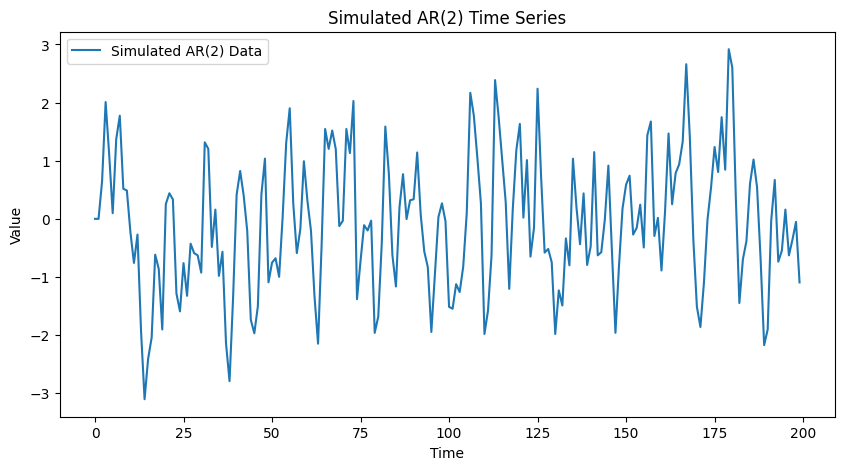

In [70]:
from statsmodels.tsa.ar_model import AutoReg

# Simulating an AR(2) process
np.random.seed(42)
n = 200
phi1, phi2 = 0.75, -0.25  # AR(2) coefficients
noise = np.random.normal(size=n)
data_ar2 = np.zeros(n)

for t in range(2, n):
    data_ar2[t] = phi1 * data_ar2[t-1] + phi2 * data_ar2[t-2] + noise[t]

# Plot the simulated AR(2) data
plt.figure(figsize=(10, 5))
plt.plot(data_ar2, label='Simulated AR(2) Data')
plt.title('Simulated AR(2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Estimated AR(2) Coefficients: [-0.04836045  0.70059387 -0.27216282]


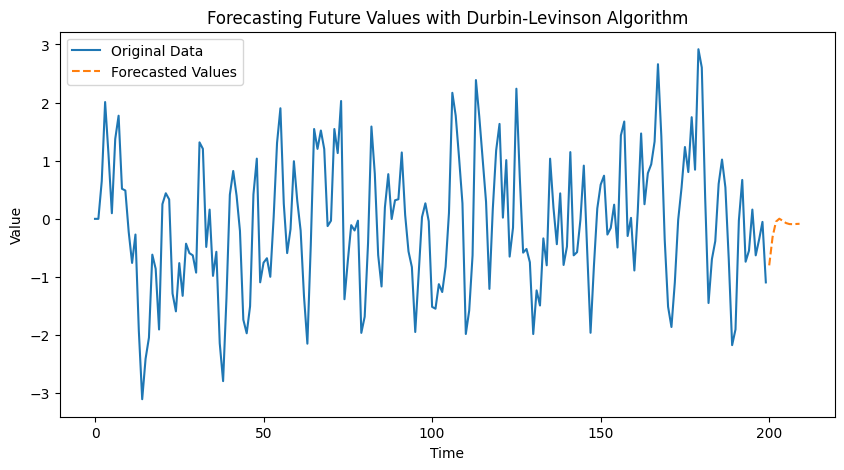

In [71]:
# Applying the Durbin-Levinson Algorithm using statsmodels' AutoReg
model = AutoReg(data_ar2, lags=2).fit()

# Print the estimated AR coefficients
print("Estimated AR(2) Coefficients:", model.params)

# Forecasting 10 steps ahead
forecast_values = model.predict(start=len(data_ar2), end=len(data_ar2) + 9)

# Plot the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(data_ar2)), data_ar2, label='Original Data')
plt.plot(np.arange(len(data_ar2), len(data_ar2) + 10), forecast_values, label='Forecasted Values', linestyle='--')
plt.title('Forecasting Future Values with Durbin-Levinson Algorithm')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### Explanation:

- **AR(2) Simulation**: We first simulated an AR(2) process with known coefficients ($\phi_1 = 0.75$, $\phi_2 = -0.25$).
- **Durbin-Levinson via AutoReg**: We applied the **Durbin-Levinson Algorithm** using `statsmodels`' `AutoReg` function, which automatically solves the Yule-Walker equations and estimates the AR coefficients.
- **Forecasting**: The model was used to forecast 10 steps into the future, as shown in the plot. The dashed line represents forecasted values, and the solid line is the actual data.

### Key Takeaways:
- The Durbin-Levinson algorithm is a powerful method for estimating autoregressive models and performing time series forecasting.
- By using the `AutoReg` model from `statsmodels`, we can easily fit AR models and make future predictions.


# The Innovations Algorithm

The **Innovations Algorithm** is used to predict future values of a time series by decomposing the time series into **innovations**—that is, the new information or the "surprise" that cannot be predicted from past observations. The innovations are orthogonal to the past observations, and the algorithm provides a way to compute the **minimum mean square error (MMSE)** predictions.

### Theory Behind the Innovations Algorithm

In the context of time series forecasting, an innovation is the difference between the observed value and its predicted value based on past information. The **Innovations Algorithm** recursively computes these innovations and uses them to update predictions for future values.

#### Steps of the Innovations Algorithm:
1. **Initialization**: Start with an initial guess for the first innovation, typically based on the first observation.
2. **Recursive Computation**: Use the previous innovations to compute the next innovation at each step.
3. **MMSE Prediction**: Minimize the prediction error by ensuring that the innovation at each step is orthogonal to the past.

The algorithm is particularly useful when the process generating the data is stationary and can be represented by a linear time series model, such as an ARMA or ARIMA model.

### Innovations and Kalman Filtering

The Innovations Algorithm can be seen as a precursor to the **Kalman Filter**, which is widely used in state-space models to recursively estimate the hidden states of a time series. The Kalman Filter extends the ideas of the Innovations Algorithm to handle more complex models, including multivariate and non-linear time series.

In practice, we can use Kalman Filtering to approximate the behavior of the Innovations Algorithm.


## Innovations Algorithm - Mathematical Theory

The **Innovations Algorithm** is used to decompose a time series into **orthogonal innovations** and compute minimum mean square error (MMSE) predictions for future values of a stationary process. The **innovations** are new information (or "surprises") that cannot be predicted from past observations.

The algorithm is closely related to **Kalman filtering** and is often used in systems where recursive updates are required.

### Mathematical Foundation of the Innovations Algorithm:

Let $X_t$ be a stationary time series with mean zero and autocovariance function $\gamma(h)$, where $h$ is the lag. The goal is to predict $X_{t+1}$ given the past observations $X_1, X_2, \dots, X_t$.

The **innovation** at time $t+1$, denoted by $\nu_{t+1}$, is defined as the difference between the true value $X_{t+1}$ and its prediction based on past observations:
$$
\nu_{t+1} = X_{t+1} - \hat{X}_{t+1|t}
$$

Where:
- $X_{t+1}$ is the actual value at time $t+1$,
- $\hat{X}_{t+1|t}$ is the predicted value of $X_{t+1}$ given the observations up to time $t$.

### Recursive Formulation of the Innovations Algorithm:

The algorithm works recursively, updating the predictions for future values based on the innovations:

1. **Initialization**:
   Start by assuming a known initial state or observation $X_1$. The initial innovation $\nu_1$ is simply:
   $$
   \nu_1 = X_1
   $$

2. **Recursive Prediction**:
   For each subsequent time step $t+1$, predict the next value $X_{t+1}$ based on past innovations:
   $$
   \hat{X}_{t+1|t} = \sum_{i=1}^{t} \theta_i \nu_i
   $$
   where $\theta_i$ are the **prediction coefficients** that minimize the mean square error.

3. **Update the Innovation**:
   The new innovation at time $t+1$ is the difference between the true value $X_{t+1}$ and its predicted value:
   $$
   \nu_{t+1} = X_{t+1} - \hat{X}_{t+1|t}
   $$
   The goal is to minimize the variance of the innovations, making them orthogonal to the past observations.

4. **Orthogonality Condition**:
   The key idea is that the innovations $\nu_{t+1}$ are orthogonal to the previous observations, ensuring that the new information (innovation) is not predictable from past values. The orthogonality condition can be written as:
   $$
   E[\nu_{t+1} \nu_i] = 0 \quad \text{for all } i \leq t
   $$

5. **Update the Prediction Coefficients**:
   The coefficients $\theta_i$ are updated recursively to minimize the prediction error, ensuring that the new innovations remain orthogonal to the past innovations.


In [72]:
!pip install pykalman

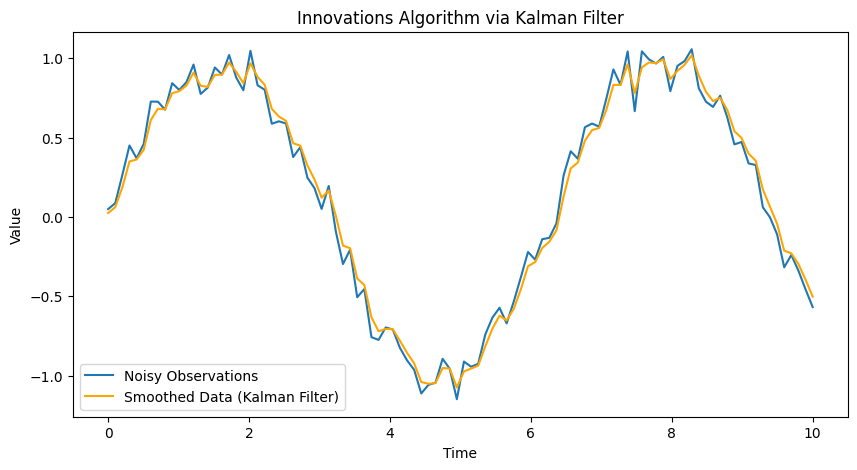

In [73]:
from pykalman import KalmanFilter

# Simulate a noisy sine wave as the time series data
np.random.seed(42)
n = 100
time = np.linspace(0, 10, n)
data = np.sin(time) + np.random.normal(0, 0.1, size=n)

# Define a basic Kalman Filter to model the innovations
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Fit the Kalman filter on the data
state_means, _ = kf.filter(data)

# Plot the original data and the smoothed estimates from the Kalman Filter
plt.figure(figsize=(10, 5))
plt.plot(time, data, label='Noisy Observations')
plt.plot(time, state_means, label='Smoothed Data (Kalman Filter)', color='orange')
plt.title('Innovations Algorithm via Kalman Filter')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### Explanation:

- **Simulated Data**: We simulated a noisy sine wave to represent time series data.
- **Kalman Filter**: We applied a basic **Kalman Filter** to recursively estimate the hidden states (smoothed data) from the noisy observations.
- **Innovations**: The difference between the actual noisy observations and the smoothed estimates represents the **innovations**—new information that the algorithm uses to update future predictions.

### Key Takeaways:
- The Innovations Algorithm decomposes a time series into orthogonal components called innovations.
- The **Kalman Filter** provides a practical way to implement this algorithm by recursively updating predictions based on new observations.
- The smoothed estimates from the Kalman Filter show the "best guess" of the underlying signal, minimizing the error from the noisy observations.





# Practical Forecasting Methods Using Python

In this section, we will focus on the key forecasting functions available in Python: `forecast`, `get_forecast`, `prediction`, and `get_prediction`. These functions are available in various libraries, such as `statsmodels`, and are used to generate either out-of-sample forecasts or in-sample predictions.

### Difference Between Forecast and Prediction

1. **Forecast**: This is used to predict **out-of-sample** data points—future values that the model hasn't seen during the training phase.
2. **Prediction**: This is used to predict **in-sample** data points—recalculating known values to validate the model.

### Key Functions:
- **`forecast`**: Projects future values based on the trained model. It does not provide confidence intervals.
- **`get_forecast`**: Similar to `forecast` but returns more detailed results, including confidence intervals.
- **`prediction`**: Predicts values based on in-sample data (data the model has already seen).
- **`get_prediction`**: Similar to `prediction`, but also returns confidence intervals for in-sample predictions.


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -268.593
Date:                Mon, 21 Oct 2024   AIC                            545.187
Time:                        10:54:11   BIC                            558.380
Sample:                             0   HQIC                           550.526
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0843      0.126     -0.671      0.503      -0.331       0.162
ar.L1          0.2854      0.134      2.138      0.033       0.024       0.547
ma.L1          0.3609      0.123      2.924      0.0

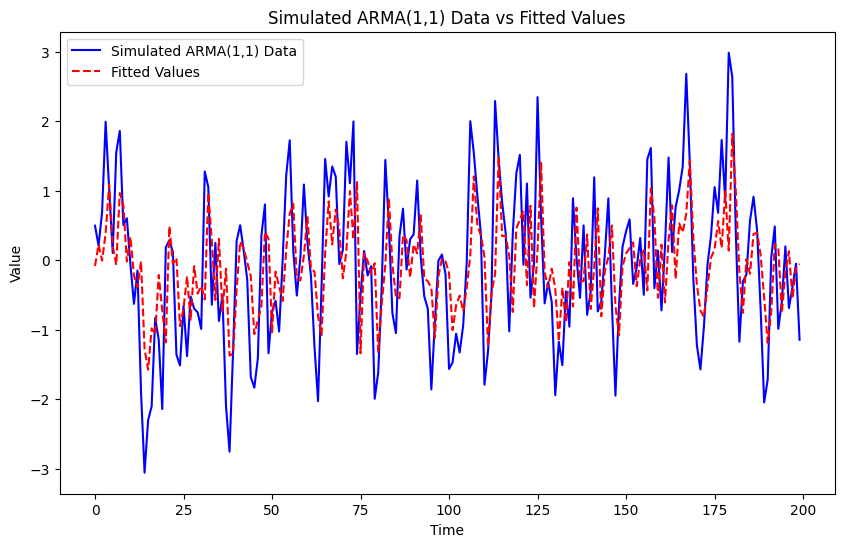

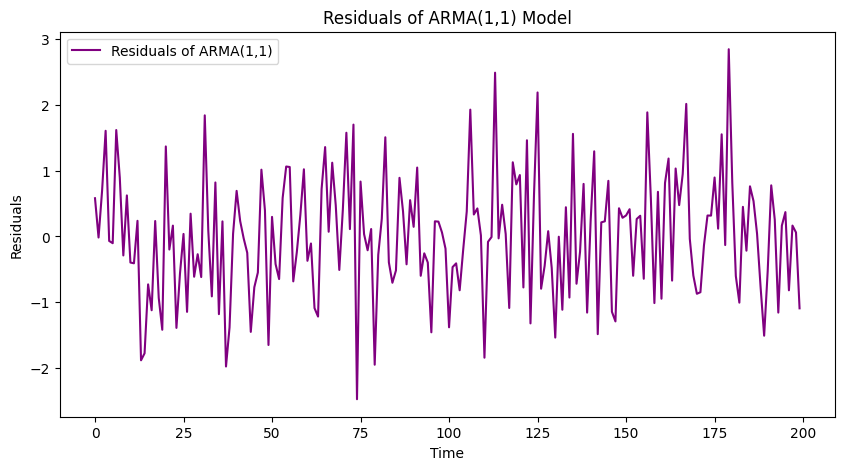

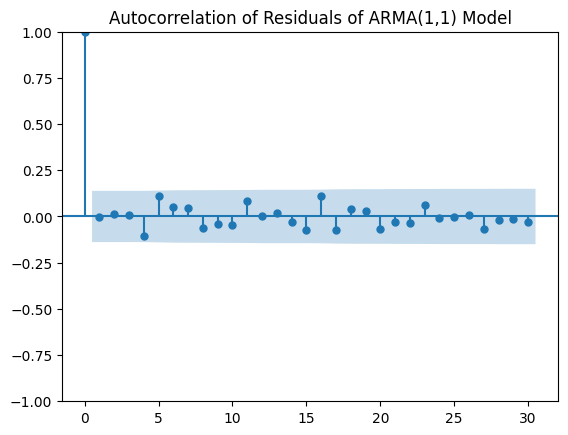

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

# Define parameters for AR and MA
ar_params = np.array([1, -0.4])  # AR(1) coefficient
ma_params = np.array([1, 0.3])  # MA(1) coefficients
n = 200  # Number of data points

# Simulate ARMA(1,1) process
np.random.seed(42)
arma_process = sm.tsa.ArmaProcess(ar_params, ma_params)
data_arma = arma_process.generate_sample(nsample=n)

# Fit ARIMA model with order (1, 0, 1)
model_arma = sm.tsa.ARIMA(data_arma, order=(1, 0, 1))
results_arma = model_arma.fit()

# Print summary of the model
print(results_arma.summary())

# Plot simulated data and fitted values
plt.figure(figsize=(10, 6))
plt.plot(data_arma, label='Simulated ARMA(1,1) Data', color='blue')
plt.plot(results_arma.fittedvalues, label='Fitted Values', linestyle='--', color='red')
plt.title('Simulated ARMA(1,1) Data vs Fitted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Residuals of the ARMA(1,1) model
residuals_arma = results_arma.resid

# Plot residuals of the ARMA(1,1) model
plt.figure(figsize=(10, 5))
plt.plot(residuals_arma, label='Residuals of ARMA(1,1)', color='purple')
plt.title('Residuals of ARMA(1,1) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot autocorrelation of residuals to check for patterns not captured by the model
plot_acf(residuals_arma, lags=30)
plt.title('Autocorrelation of Residuals of ARMA(1,1) Model')
plt.show()


## Forecast (`forecast()`) - Mathematical Explanation

The `forecast()` function predicts **out-of-sample** future values using the fitted ARMA or ARIMA model. It relies on the **autoregressive (AR)** and **moving average (MA)** components of the model to extrapolate into the future.

### ARMA(p,q) Model:

The general form of an **ARMA(p,q)** model (Autoregressive-Moving Average) is given by:

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}
$$

Where:
- $X_t$ is the value at time $t$,
- $\phi_i$ are the autoregressive (AR) coefficients,
- $\theta_i$ are the moving average (MA) coefficients,
- $\epsilon_t$ is the white noise (random error term),
- $p$ is the number of AR terms, and
- $q$ is the number of MA terms.

### One-Step Forecast:
The **1-step-ahead forecast** for the value at time $t+1$ is computed as:

$$
\hat{X}_{t+1} = \phi_1 X_t + \phi_2 X_{t-1} + \dots + \theta_1 \epsilon_t + \dots
$$

In this equation, future values are predicted based on past observed values ($X_t$) and past residuals ($\epsilon_t$). The `forecast()` function applies this logic for as many future steps as requested.


In [75]:
model_arma = results_arma

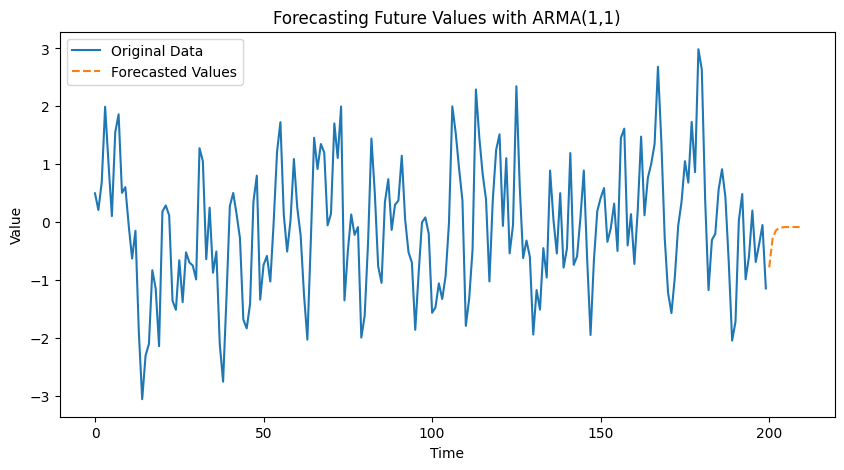

In [76]:
# Forecast future values using the fitted ARMA(1,1) model
forecast_values_arma = model_arma.forecast(steps=10)

# Plot the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(data_arma, label='Original Data')
plt.plot(range(len(data_arma), len(data_arma) + 10), forecast_values_arma, label='Forecasted Values', linestyle='--')
plt.title('Forecasting Future Values with ARMA(1,1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [77]:
#forecast() is used to predict future values out-of-sample, without providing confidence intervals or other additional statistical details.
print("Forecasted Values (Out-of-Sample):\n", forecast_values)

Forecasted Values (Out-of-Sample):
 [-0.79992124 -0.31126704 -0.0487234   0.00221954 -0.03354475 -0.07246578
 -0.0899999  -0.09169134 -0.08810422 -0.08513075]


## Get Forecast (`get_forecast()`) - Mathematical Explanation

The `get_forecast()` function provides more detailed output than `forecast()`, including **confidence intervals** and **standard errors** for each forecasted value. It uses the same ARMA model but calculates additional statistical properties.

### Confidence Intervals for Forecasts:

For each forecasted value $\hat{X}_{t+h}$, the confidence intervals are calculated as:

$$
\text{Confidence Interval} = \hat{X}_{t+h} \pm z_{\alpha/2} \cdot \text{SE}(\hat{X}_{t+h})
$$

Where:
- $\hat{X}_{t+h}$ is the forecasted value at time $t+h$,
- $z_{\alpha/2}$ is the critical value from the standard normal distribution for a given confidence level (e.g., 1.96 for 95% confidence),
- $\text{SE}(\hat{X}_{t+h})$ is the **standard error** of the forecasted value.

### Standard Error and Variance:

The **variance** of the forecast increases as we predict further into the future. The variance of the forecasted mean is calculated as:

$$
\text{Var}(\hat{X}_{t+h}) = \sigma^2 \left( 1 + \sum_{i=1}^{h} \psi_i^2 \right)
$$

Where $\psi_i$ are coefficients from the **infinite moving average** representation of the ARMA process, and $\sigma^2$ is the residual variance.

The standard error is then the square root of the variance:

$$
\text{SE}(\hat{X}_{t+h}) = \sqrt{\text{Var}(\hat{X}_{t+h})}
$$

The confidence intervals and variance help quantify the uncertainty in the forecast, with wider intervals indicating more uncertainty.


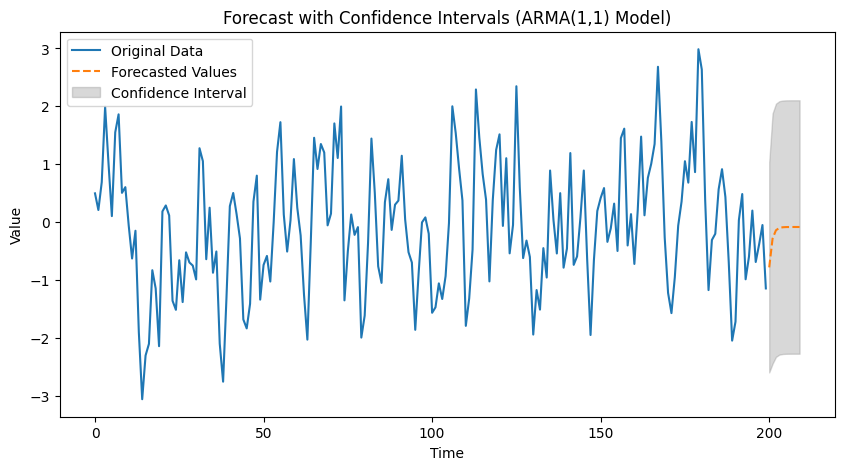

In [78]:
# Forecast future values using `get_forecast` with confidence intervals
forecast_result_arma = model_arma.get_forecast(steps=10)
forecast_values_arma = forecast_result_arma.predicted_mean
confidence_intervals_arma = forecast_result_arma.conf_int()

# Plot forecasted values with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(data_arma, label='Original Data')
plt.plot(range(len(data_arma), len(data_arma) + 10), forecast_values_arma, label='Forecasted Values', linestyle='--')
plt.fill_between(range(len(data_arma), len(data_arma) + 10), confidence_intervals_arma[:, 0], confidence_intervals_arma[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.title('Forecast with Confidence Intervals (ARMA(1,1) Model)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### Explanation:

- **`forecast`**: This function projects future values beyond the observed data. It is simple and fast but does not provide confidence intervals.
- **`get_forecast`**: In addition to projecting future values, this function returns confidence intervals around the forecasted values, providing additional insights into the uncertainty of the predictions.

### Use Cases:
- Use **`forecast`** when you need to quickly generate future projections without confidence intervals.
- Use **`get_forecast`** when you need more robust forecasts, particularly when dealing with uncertainty, as it provides confidence intervals for each prediction.


## Prediction (`prediction()`) - Mathematical Explanation

The `prediction()` function predicts **in-sample** values, meaning it predicts values for data points the model has already seen. The predicted values are the fitted values that the model computed during the training process.

### In-Sample Prediction for ARMA(p,q):

For an **ARMA(p,q)** model, the in-sample prediction for a value $X_t$ is computed as:

$$
\hat{X}_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}
$$

Where:
- $X_{t-1}, X_{t-2}, \dots$ are the previous observed values,
- $\epsilon_{t-1}, \epsilon_{t-2}, \dots$ are the previous residuals (errors),
- $\phi_1, \phi_2, \dots$ are the AR coefficients,
- $\theta_1, \theta_2, \dots$ are the MA coefficients.

The `prediction()` function applies the model to recompute these values, essentially checking how well the model fits the training data.


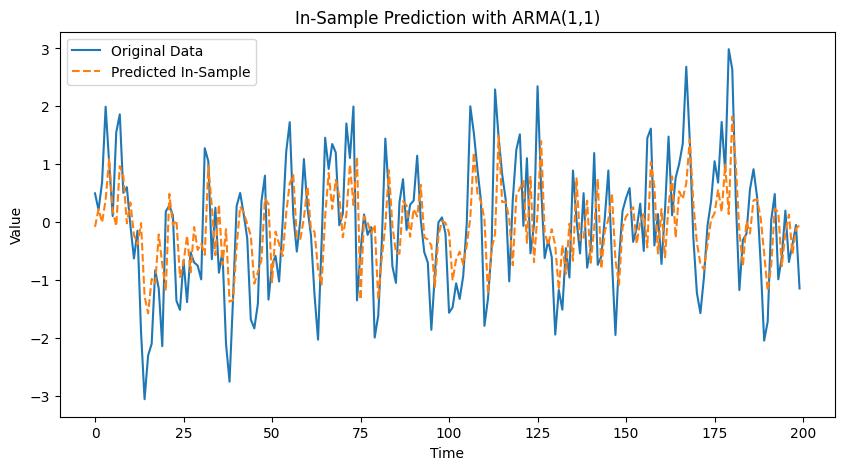

In [79]:
# Predict in-sample values using the fitted ARMA(1,1) model
predicted_in_sample_arma = model_arma.predict(start=0, end=len(data_arma)-1)

# Plot the original data vs predicted in-sample values
plt.figure(figsize=(10, 5))
plt.plot(data_arma, label='Original Data')
plt.plot(predicted_in_sample_arma, label='Predicted In-Sample', linestyle='--')
plt.title('In-Sample Prediction with ARMA(1,1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


## Get Prediction (`get_prediction()`) - Mathematical Explanation

The `get_prediction()` function is a more detailed version of `prediction()`, providing not only the in-sample predicted values but also **confidence intervals**, **standard errors**, and other statistical metrics such as **t-values** and **p-values** for hypothesis testing.

### In-Sample Prediction for ARMA(p,q):

The in-sample prediction for an **ARMA(p,q)** model follows the same logic as `prediction()`:

$$
\hat{X}_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \theta_1 \epsilon_{t-1} + \dots
$$

### Confidence Intervals for In-Sample Predictions:

For each in-sample predicted value $\hat{X}_t$, the confidence intervals are computed as:

$$
\text{Confidence Interval for } X_t = \hat{X}_t \pm z_{\alpha/2} \cdot \text{SE}(\hat{X}_t)
$$

Where $\text{SE}(\hat{X}_t)$ is the **standard error** of the prediction, calculated based on the residual variance of the model.

### T-Values and P-Values:

The **t-values** and **p-values** allow for hypothesis testing. The t-value for each predicted value is given by:

$$
t = \frac{\hat{X}_t}{\text{SE}(\hat{X}_t)}
$$

The **p-value** is then computed from the t-value, providing a measure of statistical significance. A small p-value (typically less than 0.05) indicates that the predicted value is significantly different from zero, confirming the model's usefulness for prediction.


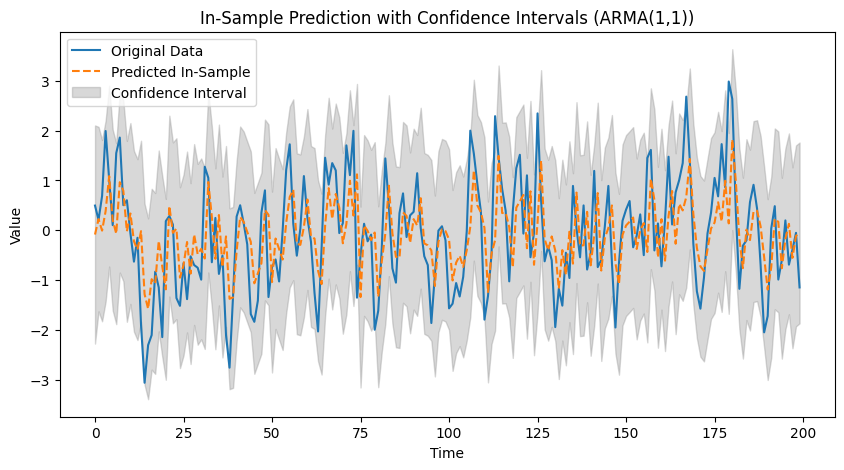

In [80]:
# Get in-sample predictions with confidence intervals using `get_prediction`
pred_result_arma = model_arma.get_prediction(start=0, end=len(data_arma)-1)
predicted_in_sample_arma = pred_result_arma.predicted_mean
confidence_intervals_arma = pred_result_arma.conf_int()

# Plot the original data vs predicted in-sample values with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(data_arma, label='Original Data')
plt.plot(predicted_in_sample_arma, label='Predicted In-Sample', linestyle='--')
plt.fill_between(range(len(data_arma)), confidence_intervals_arma[:, 0], confidence_intervals_arma[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.title('In-Sample Prediction with Confidence Intervals (ARMA(1,1))')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### Explanation:

- **`prediction`**: This function predicts values for the in-sample data, allowing you to validate how well the model fits the training data.
- **`get_prediction`**: Similar to `prediction`, but this function also returns confidence intervals for the in-sample predictions, giving you a sense of uncertainty in the model’s fit.

### Use Cases:
- Use **`prediction`** when you want to quickly check how well your model fits the in-sample data without needing confidence intervals.
- Use **`get_prediction`** when you need a more detailed evaluation of the model’s fit, including confidence intervals around each prediction.



## Summary Table: Forecasting and Prediction Functions

| **Function**      | **Use Case**                | **Mathematical Methodology**       | **Statistical Output**                                     | **Underlying Algorithm** |
|-------------------|-----------------------------|------------------------------------|------------------------------------------------------------|--------------------------|
| **`forecast()`**      | Out-of-sample forecasting   | Extrapolates ARMA model to future values | Forecasted values                                         | ARMA                     |
| **`get_forecast()`**  | Out-of-sample forecasting with additional details | Extrapolates ARMA model, with confidence intervals and error analysis | Forecasted values, confidence intervals, standard errors, variance | ARMA                     |
| **`prediction()`**    | In-sample prediction       | Recomputes known data points using the ARMA model | Predicted in-sample values                                 | ARMA                     |
| **`get_prediction()`**| In-sample prediction with additional details | Applies ARMA model to training data with statistical analysis | Predicted values, confidence intervals, standard errors, t-values, p-values, variance | ARMA                     |

### Key:
- **Out-of-sample forecasting**: Predicting values for future time points (data not seen by the model).
- **In-sample prediction**: Recalculating known data points (data used to train the model).
- **ARMA Model**: Autoregressive Moving Average, which combines autoregressive (AR) and moving average (MA) terms to model time series.
- **Confidence Intervals**: A range of values within which the true forecasted value is likely to fall.
- **Standard Error**: A measure of the accuracy of predictions.
- **Variance**: Quantifies the uncertainty in the forecasted values.
- **T-Values & P-Values**: Used for hypothesis testing to assess statistical significance.


---

### Student Details

- **Name**: Payam Taebi
- **Course**: Time Series
- **Instructor**: Dr. Fotouhi